In [1]:
import torch.nn.functional as F
import torch
import numpy as np
import anndata as ad
import pickle

import matplotlib.pyplot as plt
from matplotlib.colors import DivergingNorm
from matplotlib.patches import Patch
import pandas as pd
import seaborn as sns
from seaborn import heatmap, lineplot, clustermap

In [2]:
adata = ad.read_h5ad('/home/mcb/users/ssue1/DECON/data/MDD/mdd_healthy_sc_lake_fc_filtered_scanpp_train.h5ad')
# adata = ad.read_h5ad('/home/mcb/users/ssue1/DECON/data/Segerstolpe/healthy/healthy_scaden_scanpp_xin_train.h5ad')
# adata = ad.read_h5ad('/home/mcb/users/ssue1/DECON/data/MDD/mdd_healthy_labonte_filtered_train.h5ad')
print("Data matrix shape (n_obs x n_vars)", adata.shape)
print("Annotations: ", adata.obs.columns)

Data matrix shape (n_obs x n_vars) (16339, 25350)
Annotations:  Index(['cell_types', 'Cell_SubType', 'Subject', 'Diagnosis', 'batch_indices',
       'n_genes'],
      dtype='object')


In [3]:
print(adata.var.index)

Index(['A1BG', 'A1BG-AS1', 'A1CF', 'A2M', 'A2M-AS1', 'A2ML1', 'A2ML1-AS1',
       'A3GALT2', 'A4GALT', 'AAAS',
       ...
       'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX', 'ZZEF1', 'ZZZ3',
       'bP-21264C1.2', 'bP-2171C21.3'],
      dtype='object', length=25350)


In [4]:
with open('/home/mcb/users/ssue1/scETM/results/MDD/Nagy/mdd_healthy_sc_lake_fc_filtered_scanpp_train_scETM_nTopics40_lr0.0001_supervised1_trnGeneEmbDim0_batchScaling_globalBias_normCells_time11_08-17_58_28/embeddings.pkl','rb') as f:
    emb = pickle.load(f)
#rho = emb['rho_fixed'] # gene embeddings (gene by L) #p-scETM does not output rho since it's fixed
sc_delta = emb['delta'] # cell by topic
alpha = emb['alpha'] # topics embeddings (topic by L)
rho = emb['rho']
#sc_gene_names = emb['gene_names'] 

# store the cell embedding back in the anndata
#adata.obsm['X_scETM'] = delta

In [5]:
# pathways = pd.read_csv('/home/mcb/users/ssue1/DECON/data/pathways/mdd_healthy_cellscaled_scanpy.csv', index_col=0)
# pathways = pd.read_csv('/home/mcb/users/ssue1/DECON/data/pathways/pancreas_scadenpp_xin_healthy_cellscaled_scanpy.csv', index_col=0)
# pathways = pd.read_csv('/home/mcb/users/ssue1/DECON/data/pathways/mdd_healthy_labonte_cellscaled.csv', index_col=0)
# pathways = pd.read_csv('/home/mcb/users/ssue1/DECON/data/pathways/mdd_nagy_ex_inhib.csv', index_col=0)
# print(pathways)
# pathway_names = pathways.columns

            Astros_s    Endo_s      Ex_s   Inhib_s    OPCs_s  Oligos_s
SLC1A2      1.000000 -0.039188  0.104322 -0.084711  0.374226 -0.084512
SLC1A3      0.947427  0.377267  0.013389 -0.010872  0.251025  0.214786
GPC5        0.931488  0.494684  0.041143 -0.033409  0.087742 -0.071385
PTGDS       0.912916  0.610368 -0.000327  0.000266  0.215848  0.701364
GLUL        0.845473  0.239119 -0.150773  0.122430  0.004143  0.332303
...              ...       ...       ...       ...       ...       ...
KRI1        0.008209  0.030229  0.005627 -0.004569 -0.001197  0.013325
VWA9       -0.018691 -0.068228  0.009056 -0.007354 -0.018668  0.013312
AC012494.1 -0.000494 -0.004610  0.003980 -0.003232 -0.004223  0.013310
SMC2       -0.021700 -0.017031 -0.013234  0.010746 -0.038181  0.013298
LINC00390  -0.011190 -0.019788  0.018610 -0.015112 -0.015277  0.013268

[6943 rows x 6 columns]


In [6]:
# pathways.min()

Astros_s   -0.563945
Endo_s     -0.946123
Ex_s       -1.231502
Inhib_s    -0.812017
OPCs_s     -0.525074
Oligos_s   -0.380152
dtype: float64

In [7]:
# genes = sorted(list(set(pathways.index).intersection(adata.var_names)))
# adata = adata[:, genes]
# adata.varm['gene_emb'] = pathways.loc[genes, :].values

In [8]:
# rho = adata.varm['gene_emb']
# print(rho)

[[-4.10833000e-02  6.70319700e-02  4.07161230e-02 -3.30621800e-02
  -3.30213980e-02  2.98120900e-02]
 [ 8.95127700e-03  7.90124900e-01  1.21412175e-02 -9.85887400e-03
  -6.88453950e-03  1.27419890e-02]
 [-6.34697270e-03 -1.48230140e-02 -6.53792100e-05  5.30890250e-05
   6.35205950e-03 -1.85158460e-03]
 ...
 [ 6.12212530e-02 -6.09402600e-02  7.12178400e-02 -5.78300950e-02
  -3.05744220e-02  5.36172460e-02]
 [-3.67781500e-02 -1.06986575e-01  8.87430200e-02 -7.20608400e-02
   9.13693800e-03  1.41660050e-01]
 [-5.11739100e-03 -2.39043090e-02  5.01501050e-03 -4.07227360e-03
   1.02465460e-03  2.31034500e-02]]


In [9]:
# rho = rho.T

In [10]:
# rho_df = pd.DataFrame(rho, index=pathways.columns, columns=adata.var_names)
# rho_df

,A1BG,A2M,A2M-AS1,A2ML1-AS1,A4GALT,AAAS,AAED1,AAMDC,AASDH,AASS,...,ZNRF3-AS1,ZRANB2,ZSCAN18,ZSWIM5,ZSWIM6,ZSWIM7,ZSWIM8,ZXDC,ZZZ3,bP-21264C1.2
Astros_s,-0.041083,0.008951,-0.006347,0.063358,-0.000358,0.021733,-0.006846,-0.002005,0.062345,0.125045,...,0.061025,-0.093296,-0.012184,0.023289,0.202316,0.017252,0.046977,0.061221,-0.036778,-0.005117
Endo_s,0.067032,0.790125,-0.014823,-0.042267,0.071274,-0.043208,0.053408,0.089089,-0.101899,0.026504,...,-0.023830,-0.124440,-0.221210,0.099017,-0.169042,-0.006130,-0.069770,-0.060940,-0.106987,-0.023904
Ex_s,0.040716,0.012141,-0.000065,-0.031298,-0.000638,0.034572,0.022334,0.016464,-0.018413,-0.006655,...,0.014161,0.111837,0.077556,-0.069129,0.194229,0.027968,0.095568,0.071218,0.088743,0.005015
Inhib_s,-0.033062,-0.009859,0.000053,0.025415,0.000518,-0.028073,-0.018136,-0.013369,0.014952,0.005404,...,-0.011499,-0.090814,-0.062977,0.056134,-0.157717,-0.022711,-0.077603,-0.057830,-0.072061,-0.004072
OPCs_s,-0.033021,-0.006885,0.006352,0.030780,0.001588,-0.038304,-0.007372,-0.013339,-0.047452,0.069457,...,-0.004681,-0.134968,-0.034929,0.055133,0.567615,-0.039186,-0.063701,-0.030574,0.009137,0.001025
Oligos_s,0.029812,0.012742,-0.001852,-0.004399,-0.002385,-0.012648,-0.006522,0.032887,-0.014236,0.090532,...,-0.013608,0.042168,0.015764,-0.047209,0.224655,-0.014547,-0.072127,0.053617,0.141660,0.023103


In [11]:
# bulk = ad.read_h5ad('/home/mcb/users/ssue1/DECON/data/Xin/Xin_bulk_pp_scanpy.h5ad')
bulk = ad.read_h5ad('/home/mcb/users/ssue1/DECON/data/MDD/lake_front_ctx_bulk_filtered_scanpp.h5ad')
# bulk = ad.read_h5ad('/home/mcb/users/ssue1/DECON/data/MDD/lake_front_ctx_sc_filtered_scanpp.h5ad')
#bulk = ad.read_h5ad('/home/mcb/users/ssue1/DECON/data/MDD/ains_loo_filtered.h5ad')
print("Data matrix shape (n_obs x n_vars)", bulk.shape)
print("Annotations: ", bulk.obs.columns)

Data matrix shape (n_obs x n_vars) (13, 34305)
Annotations:  Index(['cell_types', 'batch_indices'], dtype='object')


In [12]:
print(bulk.var.index)

Index(['A1BG', 'A1BG-AS1', 'A1CF', 'A2M', 'A2M-AS1', 'A2ML1', 'A2ML1-AS1',
       'A2MP1', 'A3GALT2', 'A4GALT',
       ...
       'ZWILCH', 'ZWINT', 'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX',
       'ZZEF1', 'ZZZ3'],
      dtype='object', length=34305)


In [13]:
with open('/home/mcb/users/ssue1/scETM/results/MDD/Nagy/lake_front_ctx_bulk_filtered_scanpp_scETM_nTopics40_trnGeneEmbDim0_normCells_time11_09-13_01_54/embeddings.pkl','rb') as g:
    emb = pickle.load(g)
    
delta = emb['delta'] # cell by topic
bulk_alpha = emb['alpha'] # topics embeddings (topic by L)
bulk_gene_names = emb['gene_names']
# rho = emb['rho'] # gene embeddings (gene by L) #p-scETM does not output rho since it's fixed
# bulk_alpha = emb['alpha'] # topics embeddings (topic by L)
# bulk_gene_names = bulk_emb['gene_names'] 

# store the cell embedding back in the anndata
# bulk.obsm['X_scETM'] = delta

In [14]:
torch_delta = torch.from_numpy(delta)
theta = F.softmax(torch_delta, dim=-1)

In [15]:
torch_alpha = torch.from_numpy(alpha)
alpha_soft = F.softmax(torch_alpha, dim=0)

In [16]:
sc_torch_delta = torch.from_numpy(sc_delta)
sc_theta = F.softmax(sc_torch_delta, dim=-1)

In [17]:
unnorm = sc_theta @ alpha
probability = F.softmax(unnorm, dim=-1)
probability

tensor([[0.7538, 0.0435, 0.0379,  ..., 0.0317, 0.0289, 0.0562],
        [0.7336, 0.0459, 0.0422,  ..., 0.0348, 0.0309, 0.0597],
        [0.0471, 0.0304, 0.7032,  ..., 0.0163, 0.0477, 0.0349],
        ...,
        [0.0668, 0.0537, 0.1927,  ..., 0.0552, 0.0490, 0.0581],
        [0.0467, 0.0301, 0.7058,  ..., 0.0161, 0.0475, 0.0346],
        [0.0463, 0.0300, 0.7076,  ..., 0.0156, 0.0477, 0.0342]])

<AxesSubplot:>

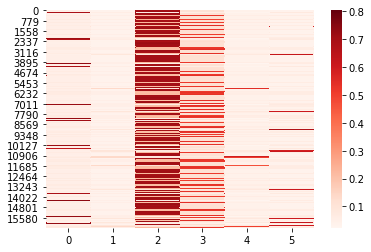

In [18]:
heatmap(probability, cmap='Reds')

In [41]:
beta = alpha @ rho

/home/mcb/users/ssue1/.conda/envs/idea/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.


<AxesSubplot:>

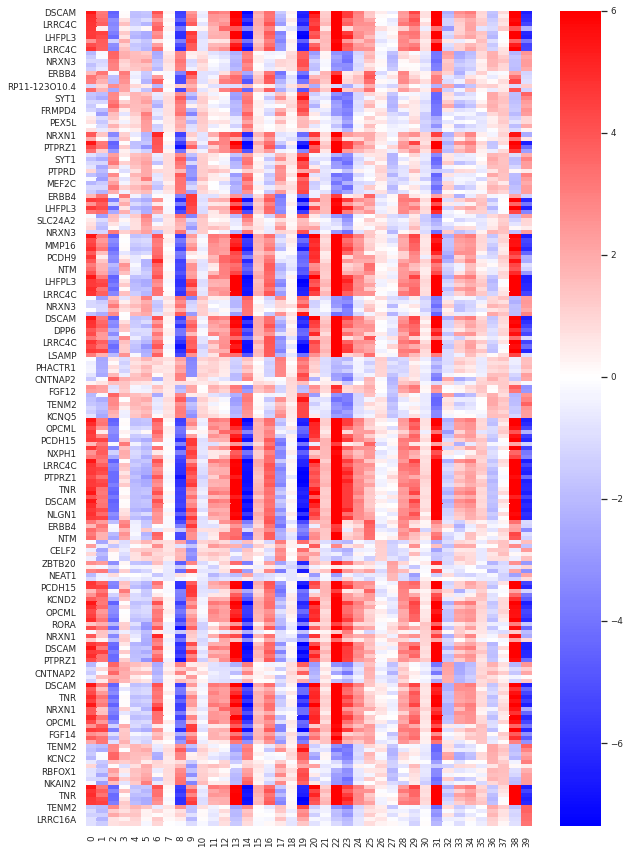

In [47]:
# beta

# beta = F.softmax(alpha_tensor(rho_tensor), dim=0).transpose(1, 0)

beta_fig = plt.figure(figsize=(10,15))
best_beta_df = pd.DataFrame(beta)
best_beta_df = best_beta_df.T

best_beta_df.index = adata.var_names
# print(best_beta_df)
# best_beta_df.to_csv('/home/mcb/users/ssue1/Figures/90topics_beta.csv')

top_five = []

for topic in range (0,40): # change number of topics
    x = best_beta_df.nlargest(5,[topic])
    top_five.append(x)

top_five_df = pd.concat(top_five)
# print(top_five_df)
# top_five_df.to_csv('/home/mcb/users/ssue1/Figures/90topics_topgenes_beta.csv')

divnorm = DivergingNorm(vmin=top_five_df.to_numpy().min(), vcenter=0, vmax=6)
#top_five_df.to_numpy().max()
sns.set(font_scale=0.8)
heatmap(top_five_df, cmap='bwr', norm=divnorm) 
#plt.savefig('/home/mcb/users/ssue1/DECON/figures/pancreas/beta.pdf')

In [43]:
top_five_df.to_numpy().max()

9.447924323581763

In [15]:
sc_delta.max()

4.9204826

/home/mcb/users/ssue1/.conda/envs/idea/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  # Remove the CWD from sys.path while we load stuff.
/home/mcb/users/ssue1/.conda/envs/idea/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


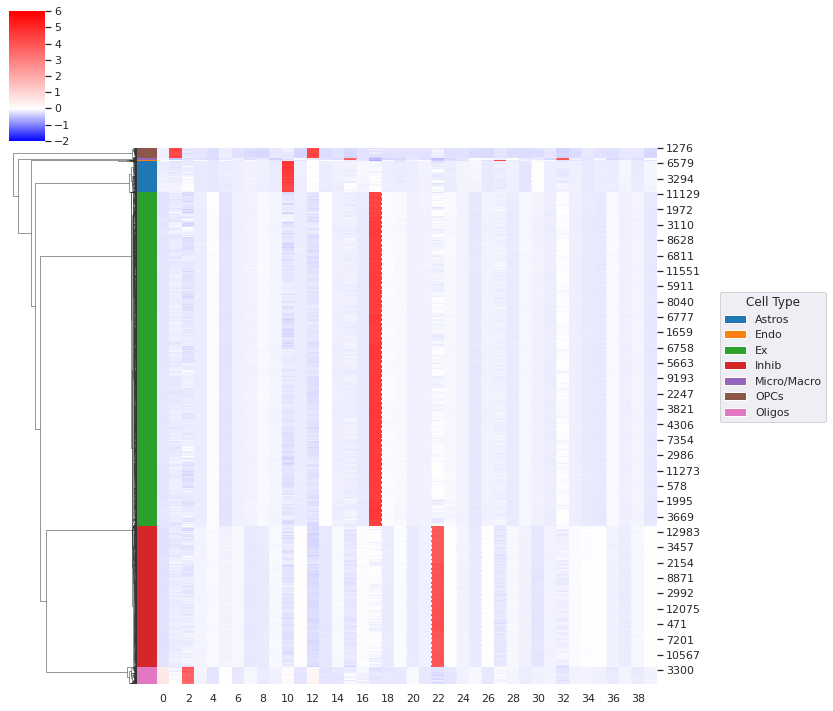

In [16]:
# delta

cell_types = pd.Series(list(adata.obs['cell_types']))
cell_types_list = list(pd.unique(list(adata.obs['cell_types'])))
cell_types_list.sort()
lut = dict(zip(cell_types_list, sns.color_palette('tab10',7)))
row_colours = cell_types.map(lut).to_numpy()

# delta_df = pd.DataFrame(delta)
divnorm = DivergingNorm(vmin=-2, vcenter=0, vmax=6)

sns.set(font_scale=1.0)
clustermap(sc_delta, col_cluster=False, row_colors=row_colours, cmap='bwr', norm=divnorm)

handles = [Patch(facecolor=lut[name]) for name in lut]
plt.legend(handles, lut, title="Cell Type", bbox_to_anchor=(1,0.5), bbox_transform=plt.gcf().transFigure, loc='center left')
plt.show()

# plt.savefig('/home/mcb/users/ssue1/DECON/figures/pancreas/theta.pdf')


/home/mcb/users/ssue1/.conda/envs/idea/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  """


<AxesSubplot:>

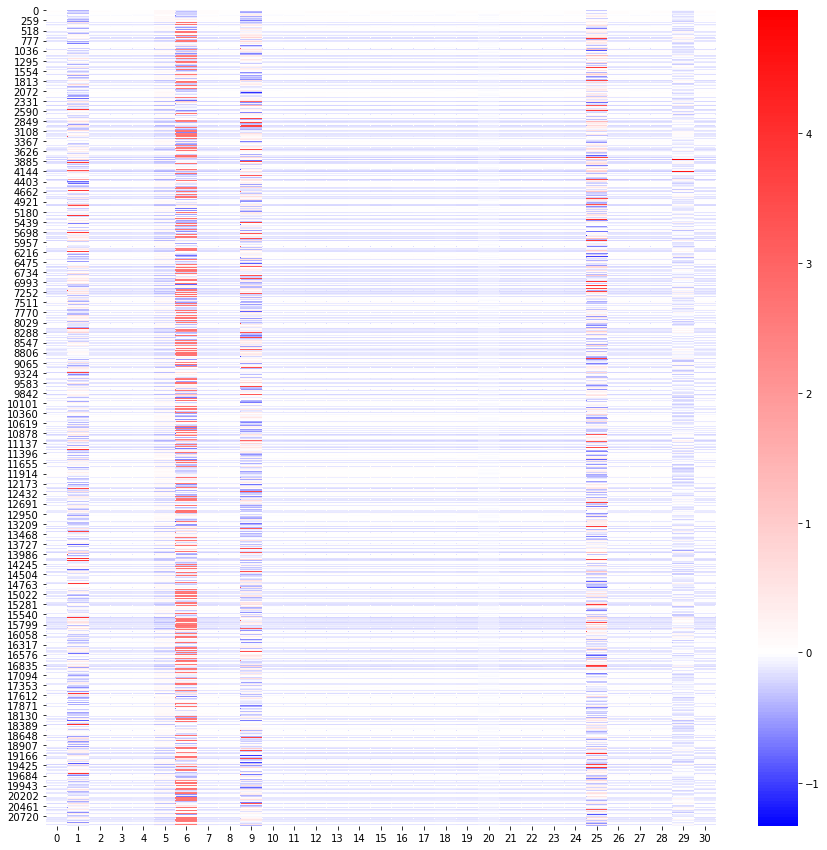

In [21]:
plt.figure(figsize=(15, 15))

# theta_np = theta.numpy()

divnorm = DivergingNorm(vmin=sc_delta.min(), vcenter=0, vmax=sc_delta.max())

heatmap(sc_delta, cmap='bwr', norm=divnorm)

<AxesSubplot:>

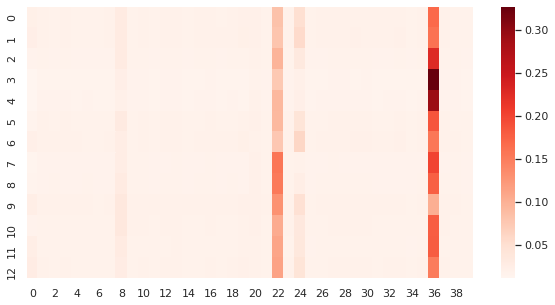

In [61]:
#bulk theta
plt.figure(figsize=(10,5))

theta_np = theta.numpy()

heatmap(theta_np, cmap='Reds')


/home/mcb/users/ssue1/.conda/envs/idea/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  # Remove the CWD from sys.path while we load stuff.


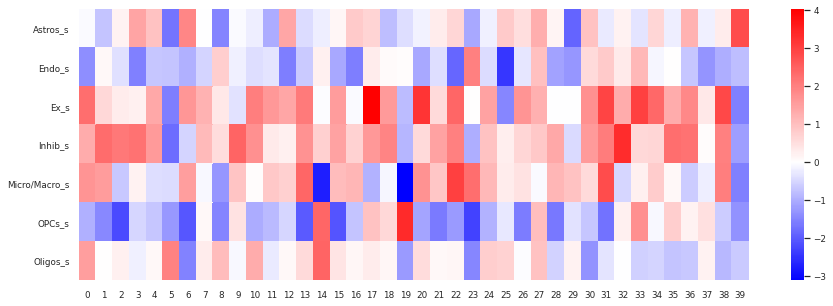

In [31]:
# alpha

plt.figure(figsize=(15, 5))
best_alpha_df = pd.DataFrame(alpha).T

best_alpha_df.index = pathway_names.values

# top_five_df.to_csv('/home/mcb/users/ssue1/DECON/results/scETM/alpha.csv')

divnorm = DivergingNorm(vmin=best_alpha_df.to_numpy().min(), vcenter=0, vmax=best_alpha_df.to_numpy().max())

# sns.set(font_scale=0.6)
heatmap(best_alpha_df, cmap='bwr', norm=divnorm)
plt.yticks(rotation=0) 
plt.show()

<AxesSubplot:>

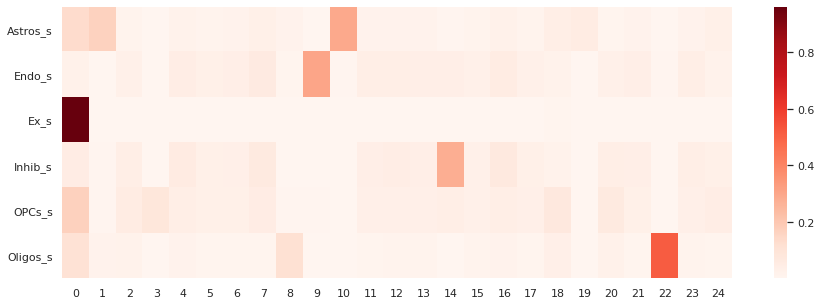

In [11]:
# alpha soft

plt.figure(figsize=(15, 5))

alpha_np = alpha_soft.numpy()
soft_alpha_df = pd.DataFrame(alpha_np).T

soft_alpha_df.index = pathway_names.values

# top_five_df.to_csv('/home/mcb/users/ssue1/DECON/results/scETM/alpha.csv')

# divnorm = DivergingNorm(vmin=soft_alpha_df.to_numpy().min(), vcenter=0, vmax=soft_alpha_df.to_numpy().max())

# sns.set(font_scale=0.6)
heatmap(soft_alpha_df, cmap='Reds')

<AxesSubplot:>

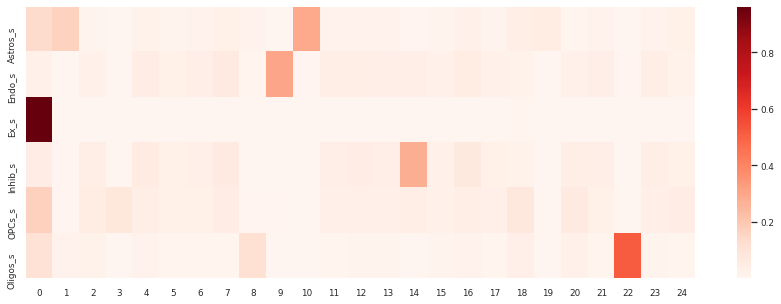

In [25]:
# bulk alpha
plt.figure(figsize=(15, 5))

bulk_alpha_np = bulk_alpha_soft.numpy()
bulk_soft_alpha_df = pd.DataFrame(bulk_alpha_np).T

bulk_soft_alpha_df.index = pathway_names.values

# top_five_df.to_csv('/home/mcb/users/ssue1/DECON/results/scETM/alpha.csv')

# divnorm = DivergingNorm(vmin=soft_alpha_df.to_numpy().min(), vcenter=0, vmax=soft_alpha_df.to_numpy().max())

# sns.set(font_scale=0.6)
heatmap(bulk_soft_alpha_df, cmap='Reds')

In [17]:
decon = F.softmax(theta @ torch_alpha, dim=1)
print(decon)

tensor([[0.1443, 0.1119, 0.1828, 0.2459, 0.1118, 0.2033],
        [0.1388, 0.1101, 0.1878, 0.2552, 0.1107, 0.1976],
        [0.1496, 0.1196, 0.1553, 0.1967, 0.1129, 0.2659],
        [0.1379, 0.1219, 0.1330, 0.1575, 0.1087, 0.3411],
        [0.1455, 0.1219, 0.1362, 0.1627, 0.1086, 0.3250],
        [0.1509, 0.1155, 0.1698, 0.2254, 0.1141, 0.2243],
        [0.1333, 0.1040, 0.2011, 0.2800, 0.1053, 0.1762],
        [0.2083, 0.1219, 0.1526, 0.1868, 0.1156, 0.2149],
        [0.2088, 0.1208, 0.1555, 0.1943, 0.1160, 0.2047],
        [0.1844, 0.1096, 0.1893, 0.2525, 0.1128, 0.1514],
        [0.1579, 0.1164, 0.1719, 0.2230, 0.1165, 0.2144],
        [0.1637, 0.1152, 0.1762, 0.2289, 0.1153, 0.2006],
        [0.1629, 0.1109, 0.1885, 0.2485, 0.1113, 0.1778]])


In [2]:
decon_df = pd.read_csv('/home/mcb/users/ssue1/scETM/results/MDD/new/mdd_healthy_sc_lake_fc_filtered_scanpp_train_scETM_nTopics40_normCells_time02_06-15_55_43/proportions.csv', index_col=0)
decon_df

,0,1,2,3,4,5
0,0.364878,0.044704,9.710407e-04,0.276312,0.134845,0.178290
1,0.260628,0.041935,8.807956e-04,0.407531,0.121947,0.167079
2,0.353350,0.038355,3.188847e-05,0.065774,0.044130,0.498358
3,0.090932,0.013768,7.803344e-07,0.000714,0.012664,0.881921
4,0.228696,0.019797,1.001234e-06,0.002439,0.011674,0.737394
5,0.307247,0.037704,2.006995e-05,0.198826,0.069955,0.386247
6,0.325958,0.039847,4.288385e-04,0.295554,0.078879,0.259333
7,0.751047,0.017203,6.453772e-07,0.000342,0.016072,0.215335
8,0.763098,0.025689,5.985559e-06,0.003579,0.040056,0.167573
9,0.663249,0.022332,2.132752e-03,0.097591,0.172142,0.042553


In [3]:
adata = ad.read_h5ad('/home/mcb/users/ssue1/DECON/data/MDD/mdd_healthy_sc_lake_fc_filtered_scanpp_test.h5ad')
adata

AnnData object with n_obs × n_vars = 7003 × 25350
    obs: 'cell_types', 'Cell_SubType', 'Subject', 'Diagnosis', 'batch_indices', 'n_genes'
    var: 'n_cells'

In [4]:
cell_types = sorted(list(adata.obs.cell_types.unique()))
cell_types

['Astros', 'Endo', 'Ex', 'Inhib', 'OPCs', 'Oligos']

In [5]:
cell_labels = torch.tensor(adata.obs.cell_types.apply(lambda x: cell_types.index(x)))
cell_labels

tensor([2, 2, 2,  ..., 2, 2, 2])

In [6]:
adata.obs.cell_types

46169       Ex
52546       Ex
74121       Ex
68840       Ex
64918       Ex
         ...  
25369       Ex
68664    Inhib
68138       Ex
29844       Ex
63870       Ex
Name: cell_types, Length: 7003, dtype: category
Categories (6, object): ['Astros', 'Endo', 'Ex', 'Inhib', 'OPCs', 'Oligos']

In [7]:
decon_df.columns = cell_types
decon_df

,Astros,Endo,Ex,Inhib,OPCs,Oligos
0,0.364878,0.044704,9.710407e-04,0.276312,0.134845,0.178290
1,0.260628,0.041935,8.807956e-04,0.407531,0.121947,0.167079
2,0.353350,0.038355,3.188847e-05,0.065774,0.044130,0.498358
3,0.090932,0.013768,7.803344e-07,0.000714,0.012664,0.881921
4,0.228696,0.019797,1.001234e-06,0.002439,0.011674,0.737394
5,0.307247,0.037704,2.006995e-05,0.198826,0.069955,0.386247
6,0.325958,0.039847,4.288385e-04,0.295554,0.078879,0.259333
7,0.751047,0.017203,6.453772e-07,0.000342,0.016072,0.215335
8,0.763098,0.025689,5.985559e-06,0.003579,0.040056,0.167573
9,0.663249,0.022332,2.132752e-03,0.097591,0.172142,0.042553


In [12]:
decon_df.index = true.index
decon_df

,Astros,Endo,Ex,Inhib,OPCs,Oligos
1,0.364878,0.044704,9.710407e-04,0.276312,0.134845,0.178290
2,0.260628,0.041935,8.807956e-04,0.407531,0.121947,0.167079
3,0.353350,0.038355,3.188847e-05,0.065774,0.044130,0.498358
4,0.090932,0.013768,7.803344e-07,0.000714,0.012664,0.881921
5,0.228696,0.019797,1.001234e-06,0.002439,0.011674,0.737394
6,0.307247,0.037704,2.006995e-05,0.198826,0.069955,0.386247
7,0.325958,0.039847,4.288385e-04,0.295554,0.078879,0.259333
8,0.751047,0.017203,6.453772e-07,0.000342,0.016072,0.215335
9,0.763098,0.025689,5.985559e-06,0.003579,0.040056,0.167573
10,0.663249,0.022332,2.132752e-03,0.097591,0.172142,0.042553


<AxesSubplot:>

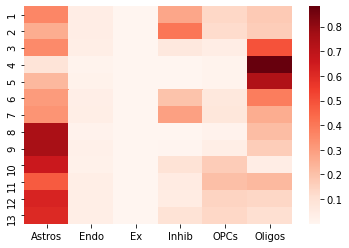

In [17]:
heatmap(decon_df, cmap='Reds')

In [25]:
decon_df.to_csv('/home/mcb/users/ssue1/DECON/results/mdd/scETM_loo_deconvolved.csv')

In [29]:
xin = pd.read_csv('/home/mcb/users/ssue1/DECON/data/Xin/Xin_bulk_counts.csv', index_col=0)
xin.columns = pathway_names
print(xin)

            alpha cell_s  beta cell_s  delta cell_s  gamma cell_s
Non T2D 1       0.716216     0.175676      0.067568      0.040541
Non T2D 2       0.166667     0.541667      0.083333      0.208333
Non T2D 3       0.642857     0.238095      0.071429      0.047619
Non T2D 4       0.518519     0.370370      0.000000      0.111111
Non T2D 5       0.442308     0.423077      0.096154      0.038462
Non T2D 6       0.750000     0.145833      0.083333      0.020833
Non T2D 7       0.296296     0.555556      0.000000      0.148148
Non T2D 8       0.333333     0.380952      0.071429      0.214286
Non T2D 9       0.702703     0.189189      0.027027      0.081081
Non T2D 10      0.418605     0.534884      0.046512      0.000000
Non T2D 11      0.796610     0.169492      0.016949      0.016949
Non T2D 12      0.626866     0.358209      0.014925      0.000000
T2D 1           0.431818     0.136364      0.034091      0.397727
T2D 2           0.602410     0.216867      0.060241      0.120482
T2D 3     

In [10]:
true = pd.read_csv('/home/mcb/users/ssue1/DECON/data/MDD/lake_front_ctx_bulk_proportions.csv', index_col=0)
true.columns = cell_types
print(true)

      Astros      Endo        Ex     Inhib      OPCs    Oligos
1   0.049327  0.007175  0.476233  0.251121  0.028700  0.187444
2   0.051817  0.007734  0.452436  0.272235  0.027842  0.187935
3   0.076142  0.005076  0.390863  0.258883  0.045685  0.223350
4   0.088803  0.007722  0.343629  0.216216  0.034749  0.308880
5   0.120141  0.007067  0.307420  0.208481  0.045936  0.310954
6   0.072937  0.000000  0.378119  0.330134  0.038388  0.180422
7   0.053269  0.000000  0.479419  0.317191  0.019370  0.130751
8   0.110000  0.003333  0.461667  0.169167  0.048333  0.207500
9   0.123223  0.005687  0.412322  0.174408  0.066351  0.218009
10  0.070227  0.002967  0.546983  0.228487  0.048467  0.102868
11  0.049226  0.009142  0.526020  0.233474  0.049930  0.132208
12  0.063863  0.000000  0.529595  0.205607  0.059190  0.141745
13  0.057692  0.002959  0.557692  0.227811  0.029586  0.124260


In [11]:
true.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')

<AxesSubplot:>

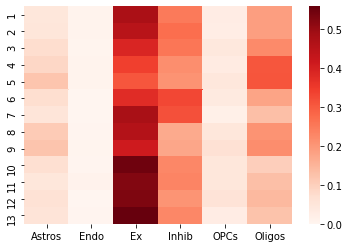

In [14]:
heatmap(true, cmap='Reds')

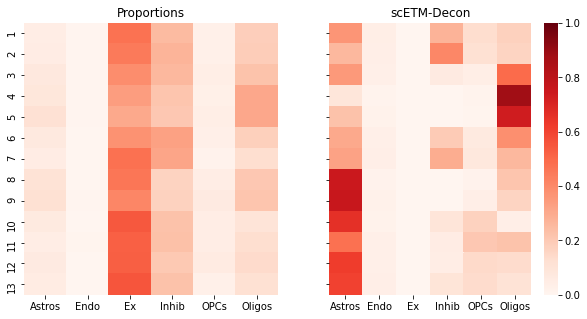

In [18]:
fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(10,5))

sns_g = sns.heatmap(true, vmin=0, vmax=1, yticklabels=True, xticklabels=True, cbar=False, ax=ax[0], cmap='Reds')
sns_g5 = sns.heatmap(decon_df, vmin=0, vmax=1,xticklabels=True, ax=ax[1], cmap='Reds')

sns.set(font_scale=0.7)
sns_g.title.set_text('Proportions')
sns_g5.title.set_text('scETM-Decon')

In [22]:
pearson = decon_df.corrwith(true, axis=1)
print(pearson)

1     0.663895
2     0.645752
3     0.423535
4     0.165692
5     0.026717
6     0.488300
7     0.680947
8     0.257880
9     0.318085
10    0.766664
11    0.712716
12    0.705454
13    0.768821
dtype: float64


In [24]:
pearson_df = pd.DataFrame(pearson, index=true.index, columns=['0'])
pearson_df

,0
1,0.663895
2,0.645752
3,0.423535
4,0.165692
5,0.026717
6,0.488300
7,0.680947
8,0.257880
9,0.318085
10,0.766664


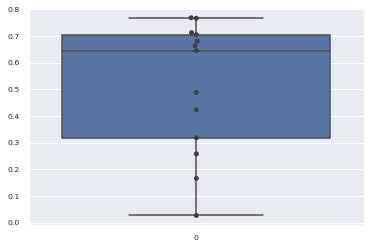

In [25]:
import seaborn as sns
ax = sns.boxplot(data=pearson_df)
ax = sns.swarmplot(data=pearson_df, color=".25")

In [32]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(xin, decon_df, squared=False)
print(rmse)

NameError: name 'xin' is not defined

In [ ]:
true_array = np.array(xin.values, dtype=float)
pred_array = np.array(decon_df.values, dtype=float)

In [34]:
print(pred_array)

[[0.44501492 0.28391603 0.12521325 0.14585581]
 [0.30085939 0.37204185 0.12221821 0.20488048]
 [0.45688665 0.30319214 0.10988248 0.13003874]
 [0.39935735 0.38334662 0.07826516 0.13903089]
 [0.38341948 0.33890972 0.12730545 0.15036535]
 [0.48655686 0.28237596 0.10708795 0.12397928]
 [0.33444166 0.43815961 0.077579   0.14981978]
 [0.29753608 0.31541994 0.15002812 0.23701584]
 [0.46075135 0.32186338 0.08333534 0.13404995]
 [0.39121303 0.38320866 0.09827012 0.12730822]
 [0.46826062 0.30719617 0.09643377 0.12810946]
 [0.41052818 0.33220661 0.11163662 0.1456286 ]
 [0.25921825 0.24613805 0.16466951 0.32997417]
 [0.35103369 0.28529173 0.15226366 0.21141091]
 [0.36917025 0.38355947 0.09603915 0.1512312 ]
 [0.33788338 0.32805952 0.1463529  0.18770412]
 [0.49069467 0.25972226 0.1118258  0.13775724]
 [0.37822691 0.3304072  0.12980464 0.16156125]]
